In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset and display some information about the dataset

In [2]:
df = pd.read_csv('bank_loan_defaulter.csv')
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [3]:
df.shape, df.dtypes

((67463, 35),
 ID                                int64
 Loan Amount                       int64
 Funded Amount                     int64
 Funded Amount Investor          float64
 Term                              int64
 Batch Enrolled                   object
 Interest Rate                   float64
 Grade                            object
 Sub Grade                        object
 Employment Duration              object
 Home Ownership                  float64
 Verification Status              object
 Payment Plan                     object
 Loan Title                       object
 Debit to Income                 float64
 Delinquency - two years           int64
 Inquires - six months             int64
 Open Account                      int64
 Public Record                     int64
 Revolving Balance                 int64
 Revolving Utilities             float64
 Total Accounts                    int64
 Initial List Status              object
 Total Received Interest         float64
 T

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

### 2. Data cleansing and Exploratory data analysis

In [5]:
df.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [6]:
df.drop(['Accounts Delinquent', 'Payment Plan'], axis=1, inplace=True) # dropping because of 1 unique value

In [7]:
df.drop('ID', axis=1).shape, df.drop('ID', axis=1).drop_duplicates().shape # checking duplicate values

((67463, 32), (67463, 32))

In [8]:
# checking % of null values

(df.isnull().sum()/df.shape[0])*100

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical    0.0
Application Type            

In [9]:
df.describe(include='O')

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,30728,36299,67340


In [10]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,16421.000000,1.177412e+06,201169.000000,1.000000


In [11]:
df.corr()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.003480,-0.003302,0.002954,0.003226,0.004258,-0.004390,-0.010578,0.000568,-0.006628,...,-0.002938,0.006674,-0.001435,-0.001802,-0.002900,0.000907,0.003745,-0.003572,-0.005141,0.000472
Loan Amount,-0.003480,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,...,-0.001887,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.003302,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,...,0.002759,0.001542,0.000462,0.000175,0.001071,-0.003476,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002954,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,...,0.001432,-0.000232,0.000966,-0.007272,0.001814,0.004248,0.006862,0.003283,0.005669,-0.000091
Term,0.003226,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,...,0.008663,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,0.004258,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,...,0.006998,0.003119,0.009348,0.001281,-0.009895,-0.012652,0.002771,-0.002567,0.016651,0.002900
Home Ownership,-0.004390,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,...,-0.010346,0.004011,0.004399,-0.003821,-0.002639,-0.004573,0.006314,0.007117,0.005008,0.003716
Debit to Income,-0.010578,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,...,0.006504,-0.010224,-0.009693,0.002200,-0.000716,0.008639,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,0.000568,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,...,-0.004511,0.007943,0.017348,0.002707,0.003451,0.001160,0.005642,0.002602,0.009315,0.009990
Inquires - six months,-0.006628,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,...,0.009556,0.008296,0.012487,0.008388,-0.004436,-0.004453,-0.002210,0.001531,0.004678,0.000578


In [12]:
# none of the features seem to be highly correlated with the target variable

In [13]:
df.drop('ID', axis=1, inplace=True) # dropping ID column with previously dropped columns

In [14]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

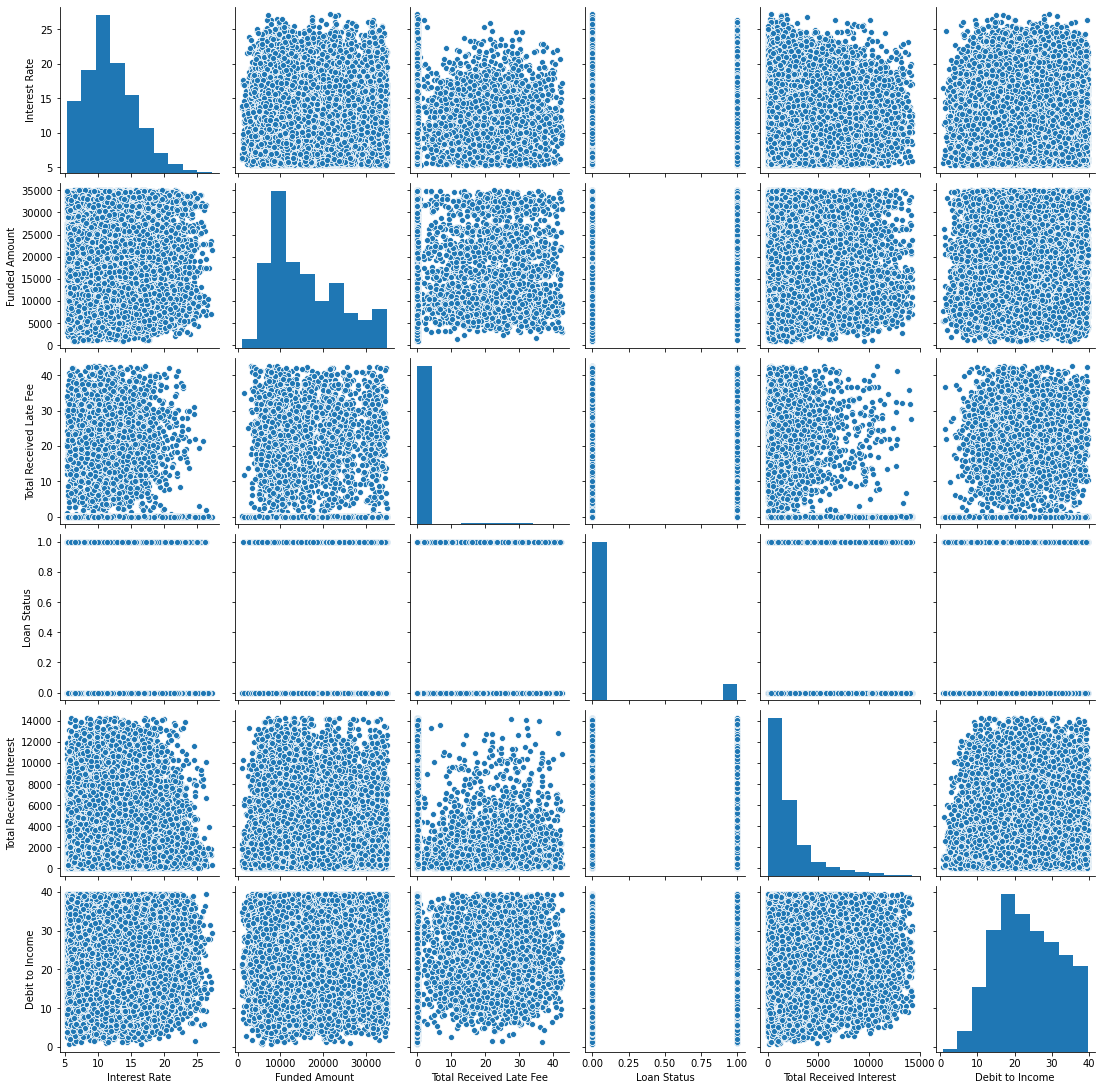

In [15]:
# univariate and multivariate plots with the important features

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df[['Employment Duration', 'Interest Rate', 'Grade', 'Funded Amount', 'Total Received Late Fee',\
               'Loan Status', 'Total Received Interest', 'Debit to Income']])

In [16]:
df['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

### 3. Data preparation for model building

In [17]:
# segregating target variable and feature columns

X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

In [18]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

label_encoders = {} # to revert back if needed

for i in X.columns:
    if(X[i].dtype == "O"):
        le = LabelEncoder()
        X[i] = le.fit_transform(X[i])
        label_encoders[i] = le

In [19]:
# !pip install imbalanced-learn

In [20]:
# oversampling dataset

from imblearn.over_sampling import SMOTE

os = SMOTE()

In [21]:
X, y = os.fit_resample(X, y)

In [22]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 61222, 1: 61222})


In [23]:
# splitting data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
X.shape

(122444, 31)

In [25]:
# select K best features

from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.svm import LinearSVC

# method 1 

X_new1 = SelectKBest(f_classif, k=20).fit_transform(X, y)

# method 2

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new2 = model.transform(X)

In [26]:
X_new1.shape, X_new2.shape

((122444, 20), (122444, 21))

### 4. Model Building and evaluation

In [27]:
df.shape

(67463, 32)

In [28]:
# Encoding categorical variables

label_encoders = {} # to revert back if needed

for i in df.columns:
    if(df[i].dtype == "O"):
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
        label_encoders[i] = le

In [29]:
# base model using imbalanced dataset

from sklearn.model_selection import train_test_split

train, test, ytrain, ytest = train_test_split(df.drop('Loan Status', axis=1), df['Loan Status'], test_size=0.3, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(train, ytrain)

train_preds = rfc.predict(train)
val_preds = rfc.predict(test)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42842
           1       1.00      1.00      1.00      4382

    accuracy                           1.00     47224
   macro avg       1.00      1.00      1.00     47224
weighted avg       1.00      1.00      1.00     47224



In [32]:
print(classification_report(ytest, val_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18380
           1       0.00      0.00      0.00      1859

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.82      0.91      0.86     20239



In [33]:
# oversampling train data then will run on validation set

os = SMOTE()
X_train, y_train = os.fit_resample(X_train, y_train)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_trainnew = model.transform(X_train)
X_testnew = model.transform(X_test)

##### Model 1 -> Random Forest

In [34]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, factor=2, resource='n_estimators', max_resources=30).fit(X_trainnew, y_train)

In [35]:
sh.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=24,
                       random_state=0)

In [36]:
sh.best_estimator_.fit(X_trainnew, y_train)

train_preds = sh.best_estimator_.predict(X_trainnew)
val_preds = sh.best_estimator_.predict(X_testnew)

In [37]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     42889
           1       0.80      0.80      0.80     42889

    accuracy                           0.80     85778
   macro avg       0.80      0.80      0.80     85778
weighted avg       0.80      0.80      0.80     85778



In [38]:
print(classification_report(y_test, val_preds))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     18333
           1       0.79      0.78      0.78     18401

    accuracy                           0.78     36734
   macro avg       0.78      0.78      0.78     36734
weighted avg       0.78      0.78      0.78     36734



##### Model 2 -> Logistic Regression

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lgrc = LogisticRegression()

param_grid = {'C': [1, 2], 'fit_intercept':[True, False]}
search = GridSearchCV(lgrc, param_grid)
search.fit(X_trainnew, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2], 'fit_intercept': [True, False]})

In [40]:
search.best_estimator_

LogisticRegression(C=1, fit_intercept=False)

In [41]:
search.best_estimator_.fit(X_trainnew, y_train)

train_preds = search.best_estimator_.predict(X_trainnew)
val_preds = search.best_estimator_.predict(X_testnew)

In [42]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     42889
           1       0.62      0.65      0.64     42889

    accuracy                           0.63     85778
   macro avg       0.63      0.63      0.63     85778
weighted avg       0.63      0.63      0.63     85778



In [43]:
print(classification_report(y_test, val_preds))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62     18333
           1       0.62      0.65      0.64     18401

    accuracy                           0.63     36734
   macro avg       0.63      0.63      0.63     36734
weighted avg       0.63      0.63      0.63     36734



##### Model 3 -> LightGBM

In [44]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

lgbc = lgb.LGBMClassifier()

param_grid = {'num_leaves': [30, 40], 'max_depth':[5, 7, 9], 'n_estimators':[100, 200, 300]}
search_lgbc = GridSearchCV(lgbc, param_grid)
search_lgbc.fit(X_trainnew, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [30, 40]})

In [45]:
search_lgbc.best_estimator_

LGBMClassifier(max_depth=9, n_estimators=300, num_leaves=40)

In [46]:
search_lgbc.best_estimator_.fit(X_trainnew, y_train)

train_preds = search_lgbc.best_estimator_.predict(X_trainnew)
val_preds = search_lgbc.best_estimator_.predict(X_testnew)

In [47]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     42889
           1       0.92      0.85      0.88     42889

    accuracy                           0.88     85778
   macro avg       0.89      0.88      0.88     85778
weighted avg       0.89      0.88      0.88     85778



In [48]:
print(classification_report(y_test, val_preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     18333
           1       0.88      0.81      0.85     18401

    accuracy                           0.85     36734
   macro avg       0.85      0.85      0.85     36734
weighted avg       0.85      0.85      0.85     36734



### 5. Pipeline

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Loan Status', axis=1), df['Loan Status'], test_size=0.3, random_state=0)

##### Method 1

In [50]:
smt = SMOTE()

model = lgb.LGBMClassifier()

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline, make_pipeline

numerical_cols = [i for i in df.drop('Loan Status', axis=1).columns if df[i].dtype != "O"]
categorical_cols = [i for i in df.drop('Loan Status', axis=1).columns if df[i].dtype == "O"]

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', LabelEncoder(), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('feature_select', SelectKBest(k=20)),
                            ('model_gridsearch', GridSearchCV(model, param_grid={'num_leaves': [30, 40], \
                             'max_depth':[5, 7, 9], 'n_estimators':[100, 200, 300]}))
                          ])

In [55]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Loan Amount',
                                                   'Funded Amount',
                                                   'Funded Amount Investor',
                                                   'Term', 'Batch Enrolled',
                                                   'Interest Rate', 'Grade',
                                                   'Sub Grade',
                                                   'Employment Duration',
                                                   'Home Ownership',
                                                   'Verification Status',
                                                   'Loan Title',
                                                   'Debit to Income',
                                                   'Delinquency - two years',
                                 

In [56]:
train_preds = pipeline.predict(X_train)
val_preds = pipeline.predict(X_test)

In [57]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     42842
           1       0.85      0.07      0.13      4382

    accuracy                           0.91     47224
   macro avg       0.88      0.54      0.54     47224
weighted avg       0.91      0.91      0.88     47224



In [58]:
print(classification_report(y_test, val_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18380
           1       0.15      0.01      0.01      1859

    accuracy                           0.91     20239
   macro avg       0.53      0.50      0.48     20239
weighted avg       0.84      0.91      0.86     20239



### 6. Conclusions

- After oversampling the scores have come down, but the model is now able to capture the minority classes
- With GridSearchCV and oversampling  the model does not seem biased, and seems stable and robust in terms of  train and validation results
-  Creating a Pipeline with Smote, Feature Selection and GridSearchCV with model made the overall process much more short and crisp